In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bayesian Classification

$
P(Label \mid Features) = \frac{P(Features \mid Label)P(Label)}{P(Features)}
$

# Gaussian Naive Bayes

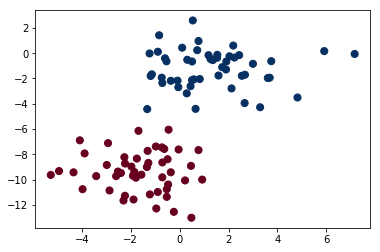

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
print(model.score(X, y))

1.0


In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

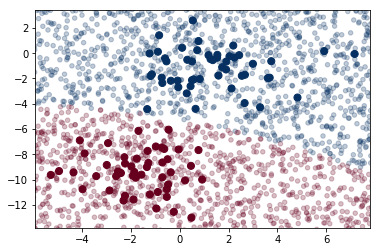

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'RdBu', alpha = 0.25)
plt.axis(lim)

In [6]:
yprob = model.predict_proba(Xnew)
print(yprob.round(3))

[[0.    1.   ]
 [0.001 0.999]
 [0.    1.   ]
 ...
 [1.    0.   ]
 [0.    1.   ]
 [0.153 0.847]]


# Multinomial Naive Bayes

In [7]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [10]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(91.68,0.5,'Predict')

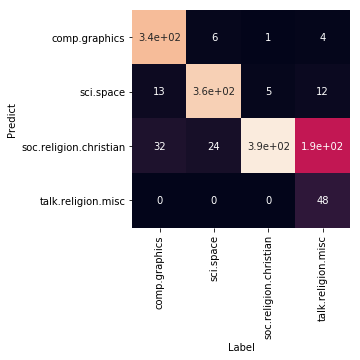

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, cbar = False, xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('Label')
plt.ylabel('Predict')

備註：~/.jupyter/jupyter_notebook_config.py/NotebookApp.iopub_data_rate_limit